<a href="https://colab.research.google.com/github/4Freek/4freek/blob/main/recommend%20system%20(anime)%20content%20based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
# from google.colab import files
# files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/CooperUnion/anime-recommendations-database'
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elimelethlopez
Your Kaggle Key: ··········


100%|██████████| 25.0M/25.0M [00:00<00:00, 79.9MB/s]


In [4]:
anime_data = pd.read_csv('/content/anime-recommendations-database/anime.csv')
rating_data = pd.read_csv('/content/anime-recommendations-database/rating.csv')

In [5]:
anime_data.head(1)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [7]:
anime_data = anime_data.rename(columns={
    'rating': 'Average_Rating', 'name':'Name', 'genre':'Genre', 'type': 'Type', 'episodes': 'Episodes', 
                                        'members':'Members'
                                        })


In [9]:
anime_data.Type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: Type, dtype: int64

In [40]:
full_data = anime_data.merge(rating_data, how='left', on='anime_id')

full_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


<AxesSubplot:xlabel='count', ylabel='Type'>

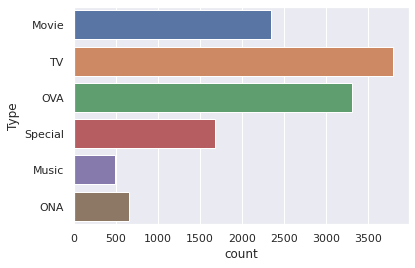

In [11]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(y="Type", data=anime_data)

In [13]:
top_10 = full_data.groupby('Name')['user_id'].count().sort_values(ascending=False).head(10).reset_index()
top_10

,Name,user_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


<AxesSubplot:xlabel='user_id', ylabel='Name'>

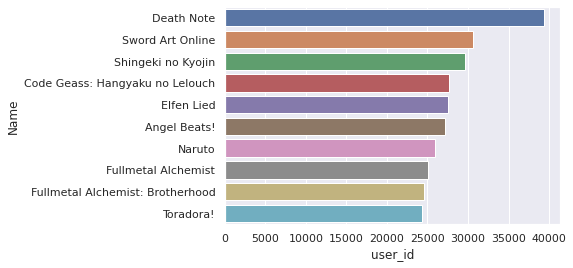

In [14]:
sns.barplot(y='Name', x='user_id', data=top_10)

In [15]:
rating_data_with_name = rating_data.merge(anime_data[['Name', 'anime_id']], how='left', on='anime_id')
rating_data_with_name.head(10)

,user_id,anime_id,rating,Name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
5,1,355,-1,Shakugan no Shana
6,1,356,-1,Fate/stay night
7,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
8,1,487,-1,Girls Bravo: Second Season
9,1,846,-1,School Rumble Ni Gakki


In [22]:
ratings = rating_data_with_name.groupby('Name')['rating'].mean().reset_index()
ratings.rename(columns={
    'rating': 'avg_ratings'
}, inplace=True)

ratings.head(10)

,Name,avg_ratings
0,&quot;0&quot;,2.769231
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748
4,&quot;Bungaku Shoujo&quot; Movie,6.457980
5,&quot;Eiji&quot;,5.000000
6,.hack//G.U. Returner,4.804110
7,.hack//G.U. Trilogy,5.347943
8,.hack//G.U. Trilogy: Parody Mode,4.589235
9,.hack//Gift,4.675581


In [23]:
ratings_count = rating_data_with_name.groupby('Name')['rating'].count().reset_index()
ratings_count.rename(columns={
    'rating': 'number_of_ratings'
}, inplace=True)

ratings_count.head(10)

,Name,number_of_ratings
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535
5,&quot;Eiji&quot;,17
6,.hack//G.U. Returner,730
7,.hack//G.U. Trilogy,1118
8,.hack//G.U. Trilogy: Parody Mode,353
9,.hack//Gift,860


In [24]:
ratings['number_of_ratings'] = ratings_count.number_of_ratings
ratings

,Name,avg_ratings,number_of_ratings
0,&quot;0&quot;,2.769231,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936,782
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
4,&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
...,...,...,...
11191,xxxHOLiC Kei,6.720774,3413
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742,2365
11193,xxxHOLiC Rou,6.403173,1513
11194,xxxHOLiC Shunmuki,6.238602,1974


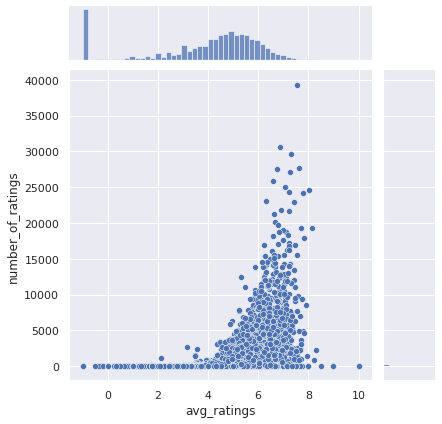

In [26]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='avg_ratings', y='number_of_ratings', data=ratings);

In [28]:
anime_community = full_data.drop_duplicates(subset=['Name', 'Members'], keep='first').sort_values(by='Members', ascending=False).head(10)

In [29]:
anime_community

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,user_id,rating
344258,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3.0,10.0
568941,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1.0,-1.0
3160089,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1.0,10.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3.0,10.0
1007982,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1.0,-1.0
159820,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,7.0,9.0
3277920,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1.0,-1.0
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5.0,9.0
2127668,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,4.0,-1.0
856702,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,1.0,-1.0


<ipython-input-30-879cd39fcd07>:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


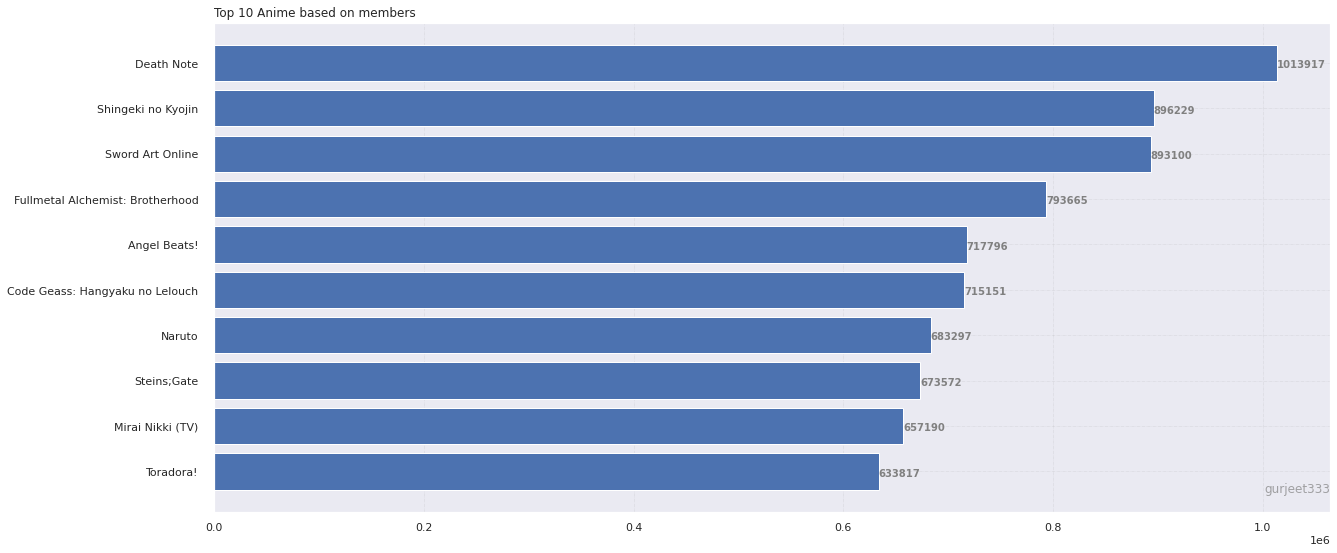

In [30]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 9))
 
# Horizontal Bar Plot
ax.barh(anime_community.Name.head(10), anime_community.Members.head(10))

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Text watermark
fig.text(0.9, 0.15, 'gurjeet333', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 # Add Plot Title
ax.set_title('Top 10 Anime based on members',
             loc ='left', )

# Show Plot
plt.show()

In [34]:
anime_data.Type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: Type, dtype: int64

In [35]:
import plotly.express as px
# Figure Size

fig = px.pie(anime_data, values=anime_data.Type.value_counts().values, names=anime_data.Type.value_counts().index, title='Medium of streaming',width=400, height=400)
fig.update_layout(
    paper_bgcolor="LightSteelBlue",
)

fig.show()

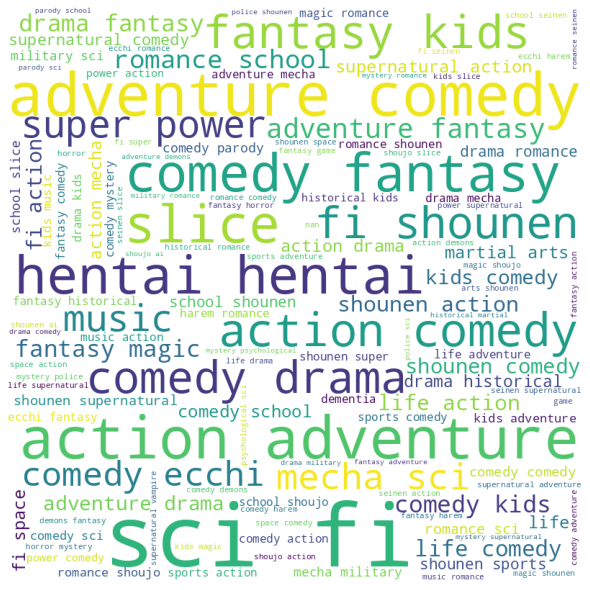

In [36]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in anime_data.Genre:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [41]:
full_data.rating.replace(to_replace=-1, value=0, inplace=True)

In [42]:
full_data.head(1)

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0


In [43]:
full_data.isnull().sum()

anime_id             0
Name                 0
Genre              140
Type                28
Episodes             0
Average_Rating     233
Members              0
user_id           1097
rating            1097
dtype: int64

In [44]:
full_data.dropna(axis=0, how='any', inplace=True)

In [45]:
full_data.head(10)

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,0.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398.0,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462.0,8.0
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490.0,10.0
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548.0,10.0


In [46]:
full_data.isnull().sum()

anime_id          0
Name              0
Genre             0
Type              0
Episodes          0
Average_Rating    0
Members           0
user_id           0
rating            0
dtype: int64

In [57]:
valid_users = full_data.user_id.value_counts().reset_index()
valid_users = valid_users.rename(columns={
    'index': 'user_id', 'user_id': 'User_Counts'
})

In [56]:
valid_users.head(10)

,user_id,User_Counts
0,48766.0,10225
1,42635.0,3747
2,53698.0,2905
3,57620.0,2702
4,59643.0,2633
5,51693.0,2620
6,27364.0,2498
7,45659.0,2469
8,7345.0,2429
9,66021.0,2362


In [58]:
valid_users.user_id = valid_users.user_id.astype(int)
valid_users = valid_users[valid_users.User_Counts>=200]
valid_users

,user_id,User_Counts
0,48766,10225
1,42635,3747
2,53698,2905
3,57620,2702
4,59643,2633
...,...,...
11273,25284,200
11274,22355,200
11275,59899,200
11276,62533,200


In [59]:
full_data_Valid_Users = full_data[full_data.user_id.isin(valid_users.user_id)]

In [60]:
full_data_Valid_Users.user_id = full_data_Valid_Users.user_id.astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
full_data_Valid_Users

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,user_id,rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684,0.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,0.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,0.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,0.0


In [62]:
anime_pivot=full_data_Valid_Users.pivot_table(index='Name',columns='user_id',values='rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
Name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


In [64]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

modelknn = NearestNeighbors(metric='cosine', algorithm='brute')
modelknn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
distances, indices = modelknn.kneighbors(anime_pivot.iloc[1,:].values.reshape(1, -1), n_neighbors = 6)

In [78]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[1]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for &quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu:

1: Otome Nadeshiko Koi Techou, with distance of 1.0:
2: Otome wa Boku ni Koishiteru, with distance of 1.0:
3: Otome Youkai Zakuro Picture Drama, with distance of 1.0:
4: Otome wa Boku ni Koishiteru: Futari no Elder, with distance of 1.0:
5: Otome Juurin Yuugi: Maiden Infringement Play, with distance of 1.0:
